In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
sb.set() # set the default Seaborn style for graphics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
pio.renderers.default = "notebook"

In [2]:
rookiedata = pd.read_csv('rookie_data.csv')
rookiedata.head()

index           Name  Hall of Fame Class  Year Drafted    GP   MIN   PTS  \
0      0    Jeff Taylor                 NaN        1982.0  44.0  17.6   3.6   
1      1  Charles Smith                 NaN        1988.0  71.0  30.4  16.3   
2      2     Mark Davis                 NaN        1988.0  33.0   7.8   3.8   
3      3  Charles Smith                 NaN        1989.0  60.0   8.7   2.9   
4      4  Michael Smith                 NaN        1989.0  65.0   9.5   5.0   

   FGM   FGA   FG%  ...  FTA   FT% OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0  1.5   3.6  40.0  ...  1.0  65.2  0.6   1.2  1.8  2.5  0.9  0.3  1.4   5.2  
1  6.1  12.4  49.5  ...  5.5  72.5  2.4   4.1  6.5  1.5  1.0  1.3  2.1  16.7  
2  1.5   3.1  48.0  ...  1.0  82.4  0.5   0.6  1.1  0.4  0.4  0.1  0.4   3.8  
3  1.0   2.2  44.4  ...  1.3  69.7  0.2   0.9  1.2  1.7  0.6  0.1  0.6   4.1  
4  2.1   4.4  47.6  ...  1.0  82.8  0.6   0.9  1.5  1.2  0.1  0.0  0.8   4.6  

[5 rows x 24 columns]

In [3]:
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               2013 non-null   int64  
 1   Name                1537 non-null   object 
 2   Hall of Fame Class  26 non-null     float64
 3   Year Drafted        1537 non-null   float64
 4   GP                  1537 non-null   float64
 5   MIN                 1537 non-null   float64
 6   PTS                 1537 non-null   float64
 7   FGM                 1537 non-null   float64
 8   FGA                 1537 non-null   float64
 9   FG%                 1537 non-null   float64
 10  3P Made             1537 non-null   float64
 11  3PA                 1537 non-null   float64
 12  3P%                 1537 non-null   object 
 13  FTM                 1537 non-null   float64
 14  FTA                 1537 non-null   float64
 15  FT%                 1537 non-null   float64
 16  OREB  

We will first clean the data by removing the empty rows

In [4]:
rookiedata.dropna(subset=['Name'], inplace=True)

In [5]:
# Change the year drafted to type int64
rookiedata['Year Drafted'] = rookiedata['Year Drafted'].astype('int')
rookiedata.loc[rookiedata['3P%'] == '-', '3P%'] = 0
rookiedata['3P%'] = rookiedata['3P%'].astype('float64')

We will change the Hall of Fame class to indicate "1" if the player has made it into the hall of fame, and "0" if the player did not make it into the hall of fame.

In [6]:
# Making Hall of Fame  as True and False.
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == False, 'Hall of Fame Class'] = 1
rookiedata.loc[rookiedata['Hall of Fame Class'].isnull() == True, 'Hall of Fame Class'] = 0
rookiedata['Hall of Fame Class'] = rookiedata['Hall of Fame Class'].astype('int')
rookiedata.rename(columns={"Hall of Fame Class": "Hall of Fame"}, inplace=True)

Now we will remove all duplicated names to effectively merge the two datasets using the names as the unique key.

In [7]:
rookiedata.drop_duplicates(subset=["Name"], keep=False, inplace=True, ignore_index=True)
rookiedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1526 non-null   int64  
 1   Name          1526 non-null   object 
 2   Hall of Fame  1526 non-null   int64  
 3   Year Drafted  1526 non-null   int64  
 4   GP            1526 non-null   float64
 5   MIN           1526 non-null   float64
 6   PTS           1526 non-null   float64
 7   FGM           1526 non-null   float64
 8   FGA           1526 non-null   float64
 9   FG%           1526 non-null   float64
 10  3P Made       1526 non-null   float64
 11  3PA           1526 non-null   float64
 12  3P%           1526 non-null   float64
 13  FTM           1526 non-null   float64
 14  FTA           1526 non-null   float64
 15  FT%           1526 non-null   float64
 16  OREB          1526 non-null   float64
 17  DREB          1526 non-null   float64
 18  REB           1526 non-null 

In [8]:
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1521   1532     Taurean Prince             0          2016  20.0  10.0   3.4   
1522   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1523   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1524   1535    Wade Baldwin IV             0          2016  22.0  13.5   3.5   
1525   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  \
0     5.3  10.7  49.5  ...  3.0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9   
1     1.9   3.9  47.8  ...  2.0  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   
2     4.2   8.3  50.3  ...  1.9  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6   
3     1.4   3.1  45.4  ...  0.7  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   
4     2.1   4.6  46.2  ...  1.8  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   
...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   
1521  1.2   3.1  39.3  ...  0.7  85.7   0.2   1.8  2.0  0.7  0.3  0.3  0.7   
1522  1.3   3.2  39.7  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   
1523  2.1   5.1  41.8  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   
1524  1.2   3.8  31.3  ...  1.3  82.1   0.3   1.1  1.5  2.1  0.6  0.3  1.3   
1525  2.3   4.1  56.0  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   

       EFF  
0     10.2  
1      6.4  
2     16.5  
3      2.8  
4      4.3  
...    ...  
1521   4.0  
1522   4.2  
1523   4.8  
1524   3.8  
1525   8.5  

[1526 rows x 24 columns]

## Combining the two datasets

Since only retired players can be elected to be in the NBA hall of fame, we need to add in the year retired for each of the rookies in the dataset.

In [9]:
playerdata = pd.read_csv('player_data.csv')
playerdata.head()

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3   Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4    Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   

         birth_date                                college  
0     June 24, 1968                        Duke University  
1     April 7, 1946                  Iowa State University  
2    April 16, 1947  University of California, Los Angeles  
3     March 9, 1969             Louisiana State University  
4  November 3, 1974              San Jose State University

In [10]:
# Create a new dataframe with name and year_end
df0 = playerdata[["name", "year_end"]].copy()
# Change the column names
df0.rename(columns={"name": "Name", "year_end": "Retired"}, inplace=True)
# Remove null values
df0.dropna(subset=['Name'], inplace=True)
# Remove duplicates
df0.drop_duplicates(subset=["Name"], keep=False, inplace=True)

Since we are only interested in whether or not the player is retired, we can modify the "Retired" column to indicate True if the player is retired and False if the player is not retired.

In [11]:
df0.loc[df0['Retired'] == 2018, 'Retired'] = 0
df0.loc[df0['Retired'] != 0, 'Retired'] = 1
df0['Retired'] = df0['Retired'].astype('int')

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4453 entries, 0 to 4549
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     4453 non-null   object
 1   Retired  4453 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.4+ KB


In [13]:
rookiedata = rookiedata.merge(df0, left_on=["Name"], right_on=["Name"])
rookiedata

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0        11       Andrew Toney             0          1980  75.0  23.6  12.9   
1        12       Bill Hanzlik             0          1980  74.0  17.0   5.4   
2        13      Bill Laimbeer             0          1980  81.0  30.4   9.8   
3        14         Billy Reid             0          1980  59.0  10.1   3.2   
4        15       Butch Carter             0          1980  54.0  12.4   5.6   
...     ...                ...           ...           ...   ...   ...   ...   
1457   1529    Rodney McGruder             0          2016  30.0  25.7   5.8   
1458   1530     Semaj Christon             0          2016  33.0  15.6   3.0   
1459   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
1460   1534      Troy Williams             0          2016  24.0  17.4   5.3   
1461   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0     5.3  10.7  49.5  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2   
1     1.9   3.9  47.8  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4   
2     4.2   8.3  50.3  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5   
3     1.4   3.1  45.4  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8   
4     2.1   4.6  46.2  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3   
...   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
1457  2.1   5.3  40.0  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5   
1458  1.3   4.0  31.8  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7   
1459  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
1460  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
1461  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

      Retired  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
1457        1  
1458        1  
1459        0  
1460        0  
1461        0  

[1462 rows x 25 columns]

## Let's do some data visualization to know our data better

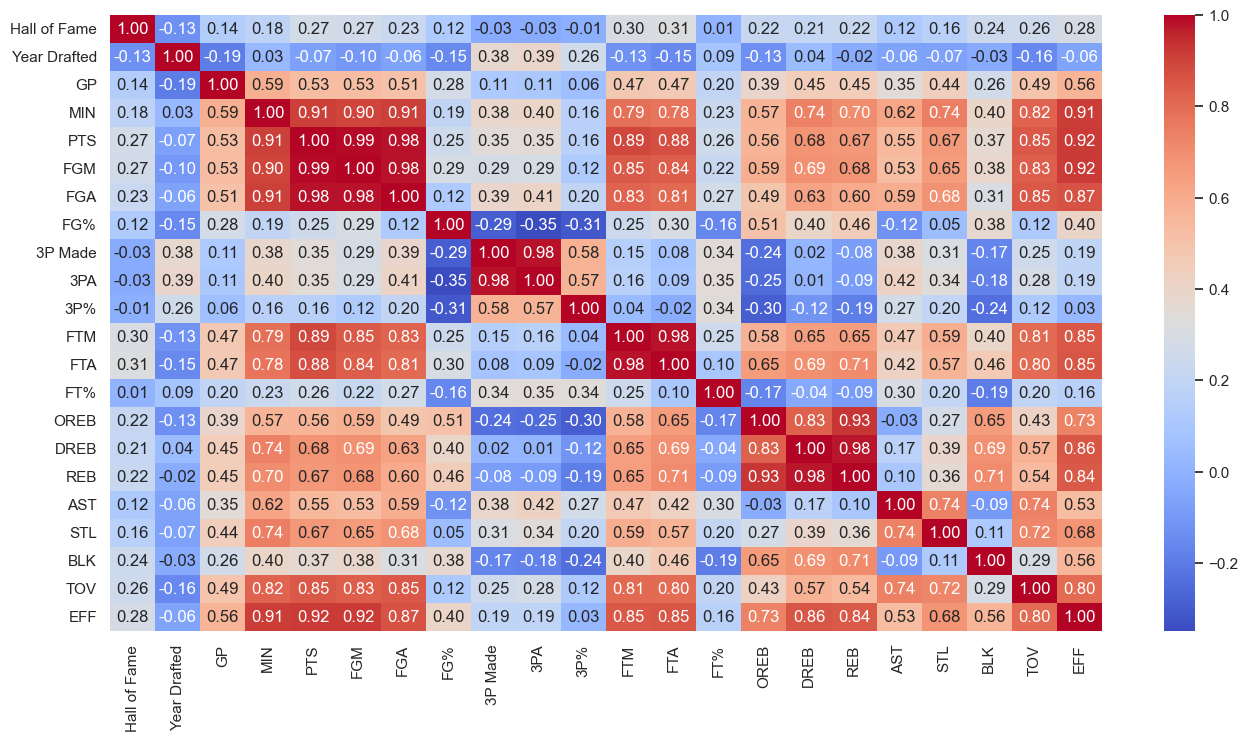

In [14]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(16, 8))
sb.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Show the plot
plt.show()

In [15]:
# Select variables of interest
nba_vars = rookiedata.loc[:, 'Name':'EFF']

# Compute the correlation matrix
corr = nba_vars.corr()

# Get the top 5 highest correlations with the 'HOF' variable
top_corr = corr['Hall of Fame'].sort_values(ascending=False)[1:6]

# Print the results
print(top_corr)

FTA    0.314928
FTM    0.301131
EFF    0.284246
PTS    0.271857
FGM    0.265879
Name: Hall of Fame, dtype: float64


In [16]:
# Filter the data to select only hall of fame players
hof_players = rookiedata[rookiedata['Hall of Fame'] == 1]

# Print the list of hall of fame players
hof_players

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
21      34       Kevin McHale             1          1980  82.0  20.1  10.0   
58      74       Isiah Thomas             1          1981  72.0  33.8  17.0   
92     111  Dominique Wilkins             1          1982  82.0  32.9  17.5   
95     115       James Worthy             1          1982  77.0  25.6  13.4   
124    147      Clyde Drexler             1          1983  82.0  17.2   7.7   
145    168      Ralph Sampson             1          1983  82.0  32.8  21.0   
162    185    Charles Barkley             1          1984  82.0  28.6  14.0   
169    194    Hakeem Olajuwon             1          1984  82.0  35.5  20.6   
174    199      John Stockton             1          1984  82.0  18.2   5.6   
181    208     Michael Jordan             1          1984  82.0  38.3  28.2   
210    237       Chris Mullin             1          1985  55.0  25.3  14.0   
219    246         Joe Dumars             1          1985  82.0  23.9   9.4   
223    250        Karl Malone             1          1985  81.0  30.6  14.9   
250    280      Dennis Rodman             1          1986  77.0  15.0   6.5   
301    333      Reggie Miller             1          1987  82.0  22.4  10.0   
303    336     Scottie Pippen             1          1987  79.0  20.9   7.9   
337    370     Mitch Richmond             1          1988  79.0  34.4  22.0   
362    396     David Robinson             1          1989  82.0  36.6  24.3   
456    493    Dikembe Mutombo             1          1991  71.0  38.3  16.6   
491    530    Alonzo Mourning             1          1992  78.0  33.9  21.0   
525    566   Shaquille O'Neal             1          1992  81.0  37.9  23.4   
616    658    Arvydas Sabonis             1          1995  73.0  23.8  14.5   
652    694      Allen Iverson             1          1996  76.0  40.1  23.5   
901    949           Yao Ming             1          2002  82.0  29.0  13.5   

      FGM   FGA   FG%  ...   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  \
21    4.3   8.1  53.3  ...  67.9   1.9   2.5   4.4  0.7  0.3  1.8  1.3  11.4   
58    6.3  14.8  42.4  ...  70.4   0.8   2.1   2.9  7.8  2.1  0.2  4.2  15.6   
92    7.3  14.9  49.3  ...  68.2   2.8   3.1   5.8  1.6  1.0  0.8  2.2  15.6   
95    5.8  10.0  57.9  ...  62.4   2.0   3.1   5.2  1.7  1.2  0.8  2.3  14.7   
124   3.1   6.8  45.1  ...  72.8   1.4   1.5   2.9  1.9  1.3  0.3  1.5   8.2   
145   8.7  16.7  52.3  ...  66.1   3.6   7.6  11.1  2.0  0.8  2.4  3.6  24.0   
162   5.2   9.5  54.5  ...  73.3   3.2   5.3   8.6  1.9  1.2  1.0  2.5  18.4   
169   8.3  15.3  53.8  ...  61.3   5.4   6.5  11.9  1.4  1.2  2.7  2.9  25.2   
174   1.9   4.1  47.1  ...  73.6   0.3   1.0   1.3  5.1  1.3  0.1  1.8   8.8   
181  10.2  19.8  51.5  ...  84.5   2.0   4.5   6.5  5.9  2.4  0.8  3.5  29.2   
210   5.2  11.3  46.3  ...  89.6   0.8   1.3   2.1  1.9  1.3  0.4  1.4  11.8   
219   3.5   7.3  48.1  ...  79.8   0.7   0.7   1.5  4.8  0.8  0.1  1.9  10.2   
223   6.2  12.5  49.6  ...  48.1   2.1   6.7   8.9  2.9  1.3  0.5  3.4  16.1   
250   2.8   5.1  54.5  ...  58.7   2.1   2.2   4.3  0.7  0.5  0.6  1.2   8.5   
301   3.7   7.6  48.8  ...  80.1   1.2   1.2   2.3  1.6  0.7  0.2  1.2   9.2   
303   3.3   7.1  46.3  ...  57.6   1.5   2.3   3.8  2.1  1.1  0.7  1.7   9.2   
337   8.2  17.5  46.8  ...  81.0   2.0   3.9   5.9  4.2  1.0  0.2  3.4  19.4   
362   8.4  15.9  53.1  ...  73.2   3.7   8.3  12.0  2.0  1.7  3.9  3.1  30.6   
456   6.0  12.2  49.3  ...  64.2   4.5   7.8  12.3  2.2  0.6  3.0  3.5  22.3   
491   7.3  14.3  51.1  ...  78.1   3.4   6.9  10.3  1.0  0.3  3.5  3.0  24.3   
525   9.0  16.1  56.2  ...  59.2   4.2   9.6  13.9  1.9  0.7  3.5  3.8  28.9   
616   5.4   9.9  54.5  ...  75.7   2.0   6.0   8.1  1.8  0.9  1.1  2.1  18.6   
652   8.2  19.8  41.6  ...  70.2   1.5   2.6   4.1  7.5  2.1  0.3  4.4  19.3   
901   4.9   9.8  49.8  ...  81.1   2.4   5.8   8.2  1.7  0.4  1.8  2.1  17.6   

     Retired  
21         1 

## As we can see, a total of 23 players from 1461 players got into Hall of Fame. Let's do some data visualization based on these 23 outstanding players.

In [17]:
import random

# function to generate random colors
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('PTS', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['PTS'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['PTS'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their points per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

<Figure size 1600x800 with 0 Axes>

In [18]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('AST', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['AST'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['AST'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their assists per game',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

<Figure size 1600x800 with 0 Axes>

In [19]:
# sort the DataFrame by PTS in descending order and select top 25 rows
sorted_players = hof_players.sort_values('FG%', ascending=False).head(25)

# calculate the average PTS for players not in HoF
avg_pts = rookiedata[~rookiedata['Name'].isin(hof_players['Name'])]['FG%'].mean()

# create trace for HoF players
trace0 = go.Bar(
    x=sorted_players['Name'].head(25),
    y=sorted_players['FG%'].head(25),
    marker=dict(
        color= random_colors(25),
    ),
    opacity=0.6,
    name='HoF Players'
)

# create trace for other players
trace1 = go.Bar(
    x=['Other non-HoF Players'],
    y=[avg_pts],
    marker=dict(
        color= 'grey',
    ),
    opacity=0.6,
    name='Other non-HoF Players'
)

# combine the traces into a data list
data = [trace0, trace1]

# create the layout
layout = go.Layout(
    title={
        'text': 'HoF players with their FG%',
        'x': 0.5,
        'y': 0.9,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

f = plt.figure(figsize=(16, 8))

# create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()

<Figure size 1600x800 with 0 Axes>

### As we can see, generally, HoF players have higher PTS, FG%, Assits per game, than the non-HoF players.

In [20]:
# create subplots with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=['EFF vs PTS', 'MIN vs PTS', 'GP vs PTS', 'FG% vs PTS'], 
                    specs=[[{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}], 
                           [{'rowspan': 1, 'colspan': 1}, {'rowspan': 1, 'colspan': 1}]], 
                    horizontal_spacing=0.2, vertical_spacing=0.2)

# define colors for each player
colors = px.colors.qualitative.Alphabet[:len(hof_players)]

# loop through the players and add each scatter plot to a subplot
for i, player in enumerate(hof_players['Name']):
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['EFF'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['MIN'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['GP'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=hof_players[hof_players['Name']==player]['PTS'],
                   y=hof_players[hof_players['Name']==player]['FG%'],
                   mode='markers',
                   name=player,
                   marker=dict(color=colors[i])
        ),
        row=2, col=2
    )

# update subplot layout and axis titles
fig.update_layout(title='Data Visualization on HoF players')
fig.update_xaxes(title_text='PTS')
fig.update_yaxes(title_text='EFF', row=1, col=1)
fig.update_yaxes(title_text='MIN', row=1, col=2)
fig.update_yaxes(title_text='GP', row=2, col=1)
fig.update_yaxes(title_text='FG%', row=2, col=2)

# show the plot
fig.show()

### As we can see, green colour dot : Michael Jordan is always on the top right, indicating he is one of the top performing players among the Hall of Fame. The left bottom grey colour dot, deem as one of the lowest performing players, John Stockton, can be viewed as the margin line to enter the Hall of Fame. Other rookie players are expected to perform better than the margin line in order to enter Hall of Fame

## Splitting the data

We will now split the data into two: retired and non-retired players, because only retired players can make it into the hall of fame. We will subsequently use the model to determine if these non-retired players will make it into the hall of fame based on their rookie statistics.

In [21]:
rookiedata_retired = rookiedata.drop(rookiedata[rookiedata['Retired'] == 0].index)
rookiedata_active = rookiedata.drop(rookiedata[rookiedata['Retired'] == 1].index)

In [22]:
rookiedata_retired.reset_index(drop=True, inplace=True)
rookiedata_retired.drop(columns="Name", inplace=True)
rookiedata_retired

index  Hall of Fame  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0        11             0          1980  75.0  23.6  12.9  5.3  10.7  49.5   
1        12             0          1980  74.0  17.0   5.4  1.9   3.9  47.8   
2        13             0          1980  81.0  30.4   9.8  4.2   8.3  50.3   
3        14             0          1980  59.0  10.1   3.2  1.4   3.1  45.4   
4        15             0          1980  54.0  12.4   5.6  2.1   4.6  46.2   
...     ...           ...           ...   ...   ...   ...  ...   ...   ...   
1186   1468             0          2015  57.0  12.2   5.0  2.0   4.9  41.0   
1187   1486             0          2015  35.0  11.3   2.4  0.8   2.3  35.0   
1188   1488             0          2015  53.0  16.4   4.5  1.8   4.3  42.2   
1189   1529             0          2016  30.0  25.7   5.8  2.1   5.3  40.0   
1190   1530             0          2016  33.0  15.6   3.0  1.3   4.0  31.8   

      3P Made  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Retired  
0         0.1  ...  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2        1  
1         0.0  ...  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4        1  
2         0.0  ...  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5        1  
3         0.0  ...  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8        1  
4         0.1  ...  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3        1  
...       ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...      ...  
1186      0.6  ...  79.2   0.2   1.3  1.5  1.9  0.6  0.1  0.8   5.4        1  
1187      0.3  ...  72.7   0.1   1.3  1.4  1.1  0.3  0.1  0.7   2.9        1  
1188      0.3  ...  93.1   0.3   1.4  1.7  3.4  0.5  0.1  1.5   6.2        1  
1189      0.8  ...  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5        1  
1190      0.2  ...  52.9   0.4   1.0  1.4  2.5  0.4  0.1  0.7   3.7        1  

[1191 rows x 24 columns]

In [23]:
rookiedata_active.reset_index(drop=True, inplace=True)
rookiedata_active

index               Name  Hall of Fame  Year Drafted    GP   MIN   PTS  \
0      775      Dirk Nowitzki             0          1998  47.0  20.4   8.2   
1      801       Vince Carter             0          1998  50.0  35.2  18.3   
2      816        Jason Terry             0          1999  81.0  23.3   8.1   
3      851     Jamal Crawford             0          2000  61.0  17.2   4.6   
4      885        Joe Johnson             0          2001  77.0  24.9   7.5   
..     ...                ...           ...           ...   ...   ...   ...   
266   1527      Pascal Siakam             0          2016  32.0  17.8   5.1   
267   1528      Patrick McCaw             0          2016  26.0  12.2   2.8   
268   1533   Tomas Satoransky             0          2016  23.0  14.7   3.1   
269   1534      Troy Williams             0          2016  24.0  17.4   5.3   
270   1536  Willy Hernangomez             0          2016  28.0  13.6   5.5   

     FGM   FGA   FG%  ...   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  \
0    2.9   7.1  40.5  ...  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4   
1    6.9  15.3  45.0  ...  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6   
2    3.1   7.4  41.5  ...  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1   
3    1.8   5.0  35.2  ...  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6   
4    3.3   7.6  43.0  ...  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8   
..   ...   ...   ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...   
266  2.3   4.3  52.5  ...  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4   
267  1.1   2.8  38.9  ...  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2   
268  1.3   3.2  39.7  ...  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2   
269  2.1   5.1  41.8  ...  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8   
270  2.3   4.1  56.0  ...  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5   

     Retired  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
266        0  
267        0  
268        0  
269        0  
270        0  

[271 rows x 25 columns]

## Resolving the Imbalance

In [24]:
print(rookiedata_retired.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1      24
dtype: int64


We realise that the data is heavily skewed and highly imbalanced.

Majority (1167 count) is not in the hall of fame while only 24 count belongs in the hall of fame.

We are going to look at 3 techniques to resolve this imbalance:

Method 1: Undersampling
Method 2: Oversampling
Method 3: SMOTE

## Undersampling
### Reducing the data by eliminating examples belonging to the majority class with the objective of equalizing the number of examples of each class

In [25]:
#split into X and y
dfy = rookiedata_retired[['Hall of Fame']]
dfX = rookiedata_retired.drop(['Hall of Fame','Retired'], axis=1)

<Figure size 1600x800 with 0 Axes>

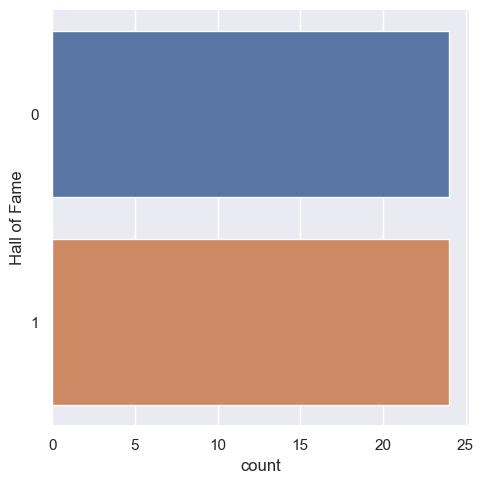

In [26]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_US, y_US = undersample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_US, kind = "count")

In [27]:
# New dataset will be balanced with same number of Hall of Fame = 1 and Hall of Fame = 0
data_US = pd.concat([X_US, y_US], axis=1)
data_US.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0   1108          2006  67.0  12.9   3.7  1.5   3.6  42.3      0.4  1.3  ...   
1     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
2   1438          2014  31.0  10.7   3.4  1.2   3.3  35.3      0.5  2.1  ...   
3   1150          2007  73.0  17.5   5.6  2.2   4.2  53.8      0.0  0.0  ...   
4    749          1997  58.0  12.8   4.0  1.6   3.6  44.9      0.0  0.0  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  80.8   0.3   1.1  1.4  3.3  0.5  0.0  1.1   5.6             0  
1  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2             0  
2  55.2   0.3   1.1  1.4  0.4  0.3  0.1  0.2   2.8             0  
3  60.9   1.6   2.8  4.4  0.4  0.4  1.4  1.0   8.6             0  
4  59.7   1.1   1.8  2.9  0.3  0.2  1.4  0.7   5.7             0  

[5 rows x 23 columns]

In [28]:
#check count
print(data_US.groupby('Hall of Fame').size())

Hall of Fame
0    24
1    24
dtype: int64


Disadvantage: The deletion of observations in this random manner may lead to the deletion of some very useful information from the dataset

## Oversampling
### Random over-sampling is a technique that randomly samples a number of observations from the minority class (sampling is done with replacement) and adds them to the dataset.

<Figure size 1600x800 with 0 Axes>

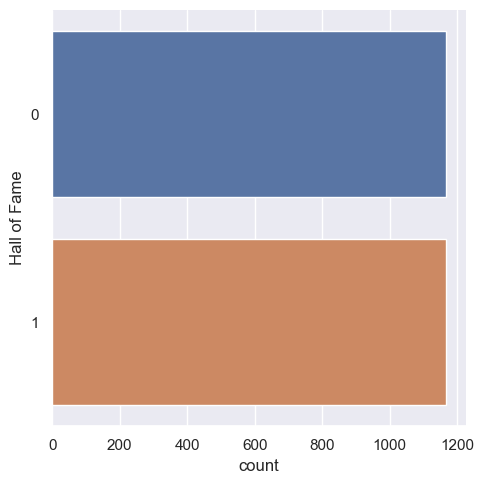

In [29]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_OS, y_OS = oversample.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_OS, kind = "count")

In [30]:
#new dataset will be balanced with same number of isfraud=1 and isfraud=0
data_OS = pd.concat([X_OS, y_OS], axis=1)
data_OS.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2             0  
1  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4             0  
2  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5             0  
3  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8             0  
4  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3             0  

[5 rows x 23 columns]

In [31]:
#check count
print(data_OS.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


Disadvantage: This technique may increase the chance of model overfitting.

## SMOTE
### SMOTE is a technique that generates new observations by interpolating between observations in the original dataset. Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels.

<Figure size 1600x800 with 0 Axes>

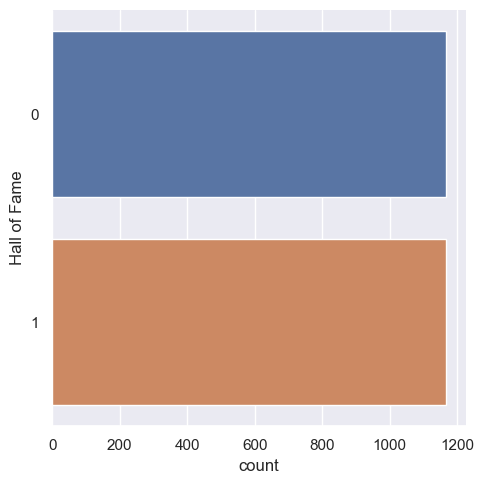

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SM, y_SM = smote.fit_resample(dfX, dfy)

f = plt.figure(figsize=(16, 8))
sb.catplot(y = "Hall of Fame", data = y_SM, kind = "count")

In [33]:
#new dataset will be balanced with same number of Hall of Fame = True and Hall of Fame = False
data_SM = pd.concat([X_SM, y_SM], axis=1)
data_SM.head()

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  \
0     11          1980  75.0  23.6  12.9  5.3  10.7  49.5      0.1  0.4  ...   
1     12          1980  74.0  17.0   5.4  1.9   3.9  47.8      0.0  0.1  ...   
2     13          1980  81.0  30.4   9.8  4.2   8.3  50.3      0.0  0.0  ...   
3     14          1980  59.0  10.1   3.2  1.4   3.1  45.4      0.0  0.1  ...   
4     15          1980  54.0  12.4   5.6  2.1   4.6  46.2      0.1  0.2  ...   

    FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  Hall of Fame  
0  71.2   0.4   1.5  1.9  3.6  0.8  0.1  2.9  10.2             0  
1  79.3   0.9   1.2  2.1  1.5  0.8  0.3  1.1   6.4             0  
2  76.5   3.3   5.3  8.6  2.7  0.7  1.0  1.6  16.5             0  
3  56.4   0.5   0.6  1.0  1.2  0.6  0.1  1.3   2.8             0  
4  73.7   0.6   0.6  1.2  1.0  0.4  0.0  0.9   4.3             0  

[5 rows x 23 columns]

In [34]:
#check count
print(data_SM.groupby('Hall of Fame').size())

Hall of Fame
0    1167
1    1167
dtype: int64


### We will decide which method to adopt by looking at the correlation between Hall of Fame and EFF after each method through a scatterplot graph.

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999557 -0.494586 -0.289335 -0.306872 -0.366670   
Year Drafted  0.999557      1.000000 -0.496829 -0.290593 -0.309025 -0.369281   
GP           -0.494586     -0.496829  1.000000  0.700358  0.601752  0.621999   
MIN          -0.289335     -0.290593  0.700358  1.000000  0.946891  0.935869   
PTS          -0.306872     -0.309025  0.601752  0.946891  1.000000  0.990474   
FGM          -0.366670     -0.369281  0.621999  0.935869  0.990474  1.000000   
FGA          -0.322133     -0.323932  0.594933  0.941574  0.984200  0.982578   
FG%          -0.358731     -0.359631  0.343282  0.270134  0.271806  0.317120   
3P Made       0.360527      0.364479 -0.003936  0.190416  0.161494  0.103037   
3PA           0.400532      0.404947 -0.056143  0.164361  0.139685  0.078260   
3P%           0.167819      0.169510  0.112509  0.161672  0.118122  0.098189   
FTM          -0.197941     -0.199544  0.514186  0.888418  0.940764  0.891641   
FTA          -0.220758     -0.223629  0.538135  0.917622  0.956376  0.921697   
FT%           0.039444      0.045163  0.062823  0.173398  0.214202  0.143070   
OREB         -0.288203     -0.291567  0.526683  0.704556  0.696816  0.724791   
DREB         -0.162580     -0.167677  0.521282  0.752326  0.746299  0.758375   
REB          -0.209331     -0.213979  0.536390  0.753877  0.746537  0.764407   
AST          -0.198601     -0.197922  0.443342  0.591824  0.534128  0.493765   
STL          -0.310350     -0.306209  0.490414  0.700682  0.677282  0.645680   
BLK          -0.107675     -0.112506  0.386503  0.573773  0.591470  0.597547   
TOV          -0.323022     -0.324512  0.623734  0.917047  0.911751  0.905530   
EFF          -0.293986     -0.297103  0.645137  0.929620  0.953311  0.946506   
Hall of Fame -0.428279     -0.432578  0.684040  0.728498  0.725623  0.734880   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.322133 -0.358731  0.360527  0.400532  ...  0.039444 -0.288203   
Year Drafted -0.323932 -0.359631  0.364479  0.404947  ...  0.045163 -0.291567   
GP            0.594933  0.343282 -0.003936 -0.056143  ...  0.062823  0.526683   
MIN           0.941574  0.270134  0.190416  0.164361  ...  0.173398  0.704556   
PTS           0.984200  0.271806  0.161494  0.139685  ...  0.214202  0.696816   
FGM           0.982578  0.317120  0.103037  0.078260  ...  0.143070  0.724791   
FGA           1.000000  0.174866  0.225252  0.206354  ...  0.200959  0.639350   
FG%           0.174866  1.000000 -0.374026 -0.436059  ... -0.293287  0.488169   
3P Made       0.225252 -0.374026  1.000000  0.990327  ...  0.177214 -0.236738   
3PA           0.206354 -0.436059  0.990327  1.000000  ...  0.189066 -0.272228   
3P%           0.180345 -0.400654  0.513745  0.516699  ...  0.442337 -0.291945   
FTM           0.891702  0.213513  0.120582  0.109123  ...  0.355896  0.631293   
FTA           0.911589  0.262346  0.100371  0.082977  ...  0.199751  0.717628   
FT%           0.200959 -0.293287  0.177214  0.189066  ...  1.000000 -0.157294   
OREB          0.639350  0.488169 -0.236738 -0.272228  ... -0.157294  1.000000   
DREB          0.682631  0.439856 -0.170589 -0.200185  ... -0.113118  0.894590   
REB           0.683144  0.468233 -0.198068 -0.230415  ... -0.132380  0.951507   
AST           0.585736 -0.135268  0.481271  0.465561  ...  0.326182 -0.044257   
STL           0.695251  0.059894  0.349750  0.349657  ...  0.254930  0.211868   
BLK           0.514825  0.394642 -0.273130 -0.297890  ... -0.112923  0.840380   
TOV           0.926425  0.170049  0.210724  0.180853  ...  0.116657  0.598927   
EFF           0.901993  0.408955  0.010552 -0.019176  ...  0.133409  0.821089   
Hall of Fame  0.712080  0.294599  0.011946 -0.025128  ...  0.155490  0.597588   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.162580 -0.209331 -0.198601 -0.310350 -0.107675 -0.323022   

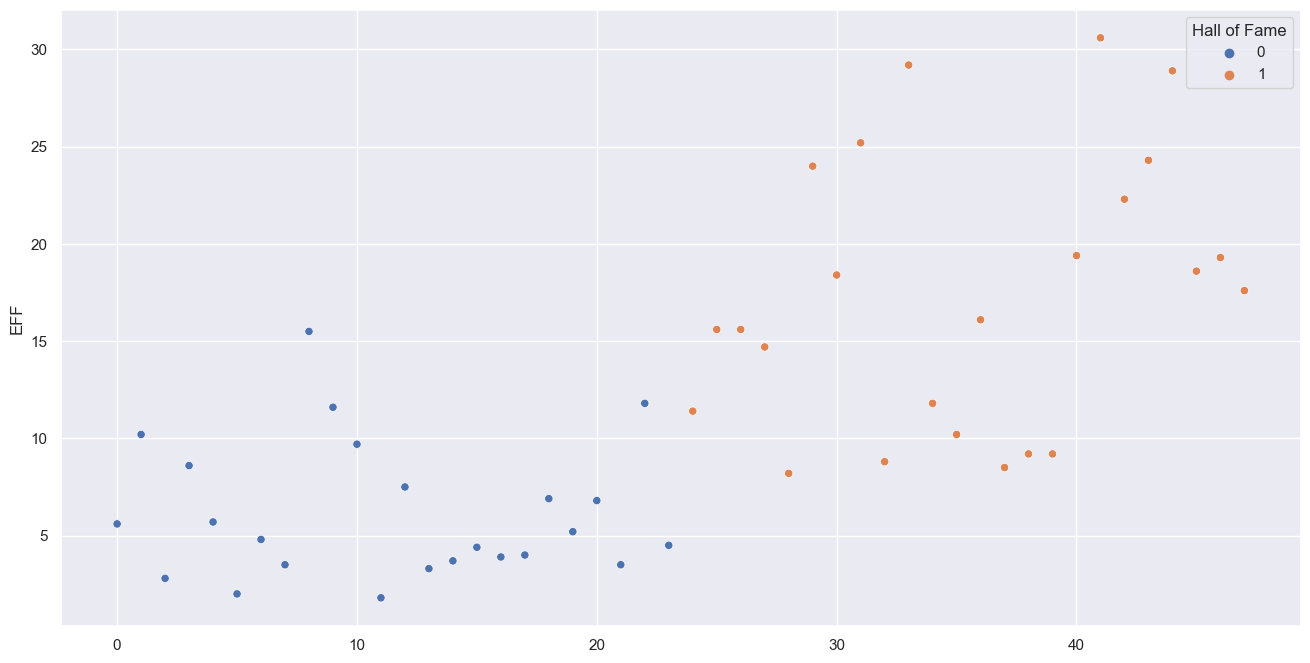

In [35]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_US, x=data_US.index, y='EFF', hue='Hall of Fame')
data_US.corr()

Correlation between **EFF** and **Hall of Fame** = **0.651**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.999226 -0.411851 -0.224499 -0.275320 -0.315204   
Year Drafted  0.999226      1.000000 -0.411243 -0.226579 -0.277788 -0.317905   
GP           -0.411851     -0.411243  1.000000  0.629227  0.567572  0.584649   
MIN          -0.224499     -0.226579  0.629227  1.000000  0.936006  0.930955   
PTS          -0.275320     -0.277788  0.567572  0.936006  1.000000  0.991413   
FGM          -0.315204     -0.317905  0.584649  0.930955  0.991413  1.000000   
FGA          -0.275525     -0.277882  0.554572  0.939870  0.980977  0.981850   
FG%          -0.349368     -0.349733  0.491248  0.395317  0.446439  0.483229   
3P Made       0.335000      0.334765 -0.003680  0.195416  0.148568  0.105607   
3PA           0.330038      0.329827 -0.016366  0.200128  0.154097  0.110296   
3P%           0.243292      0.242502  0.015765  0.011744 -0.021993 -0.041666   
FTM          -0.217470     -0.219042  0.488896  0.855701  0.936353  0.890372   
FTA          -0.236516     -0.239426  0.506254  0.879154  0.944388  0.910660   
FT%           0.064967      0.067842  0.096950  0.136059  0.159868  0.107320   
OREB         -0.241680     -0.243111  0.494770  0.707588  0.711741  0.733632   
DREB         -0.103499     -0.108130  0.469870  0.748746  0.755186  0.759150   
REB          -0.154764     -0.158414  0.491050  0.753690  0.759415  0.769772   
AST          -0.205331     -0.206224  0.351587  0.536921  0.466985  0.436633   
STL          -0.334217     -0.330567  0.439031  0.640235  0.621365  0.606672   
BLK          -0.118569     -0.121565  0.372145  0.576580  0.614834  0.607615   
TOV          -0.303020     -0.306457  0.565937  0.904016  0.898218  0.890877   
EFF          -0.260723     -0.263287  0.596583  0.912880  0.953089  0.944570   
Hall of Fame -0.470826     -0.468225  0.597223  0.611330  0.658543  0.665062   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.275525 -0.349368  0.335000  0.330038  ...  0.064967 -0.241680   
Year Drafted -0.277882 -0.349733  0.334765  0.329827  ...  0.067842 -0.243111   
GP            0.554572  0.491248 -0.003680 -0.016366  ...  0.096950  0.494770   
MIN           0.939870  0.395317  0.195416  0.200128  ...  0.136059  0.707588   
PTS           0.980977  0.446439  0.148568  0.154097  ...  0.159868  0.711741   
FGM           0.981850  0.483229  0.105607  0.110296  ...  0.107320  0.733632   
FGA           1.000000  0.345217  0.224543  0.235800  ...  0.154331  0.646488   
FG%           0.345217  1.000000 -0.329234 -0.359857  ... -0.143435  0.613899   
3P Made       0.224543 -0.329234  1.000000  0.990708  ...  0.233761 -0.236181   
3PA           0.235800 -0.359857  0.990708  1.000000  ...  0.240448 -0.252613   
3P%           0.032441 -0.304222  0.488590  0.480762  ...  0.416650 -0.347899   
FTM           0.876287  0.390206  0.050103  0.058839  ...  0.244464  0.662863   
FTA           0.886837  0.431767  0.023281  0.028953  ...  0.093720  0.742896   
FT%           0.154331 -0.143435  0.233761  0.240448  ...  1.000000 -0.190307   
OREB          0.646488  0.613899 -0.236181 -0.252613  ... -0.190307  1.000000   
DREB          0.681994  0.551398 -0.160449 -0.178124  ... -0.132430  0.885745   
REB           0.686580  0.589856 -0.191950 -0.209737  ... -0.157689  0.948510   
AST           0.529731 -0.096621  0.398742  0.430019  ...  0.244310 -0.060302   
STL           0.653640  0.130766  0.247378  0.283497  ...  0.155877  0.202007   
BLK           0.517704  0.512431 -0.255843 -0.275459  ... -0.118165  0.830496   
TOV           0.904737  0.334987  0.159433  0.170332  ...  0.026346  0.621379   
EFF           0.895170  0.562111 -0.007655 -0.010707  ...  0.081884  0.829099   
Hall of Fame  0.619421  0.511254 -0.078497 -0.081856  ...  0.044123  0.540502   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.103499 -0.154764 -0.205331 -0.334217 -0.118569 -0.303020   

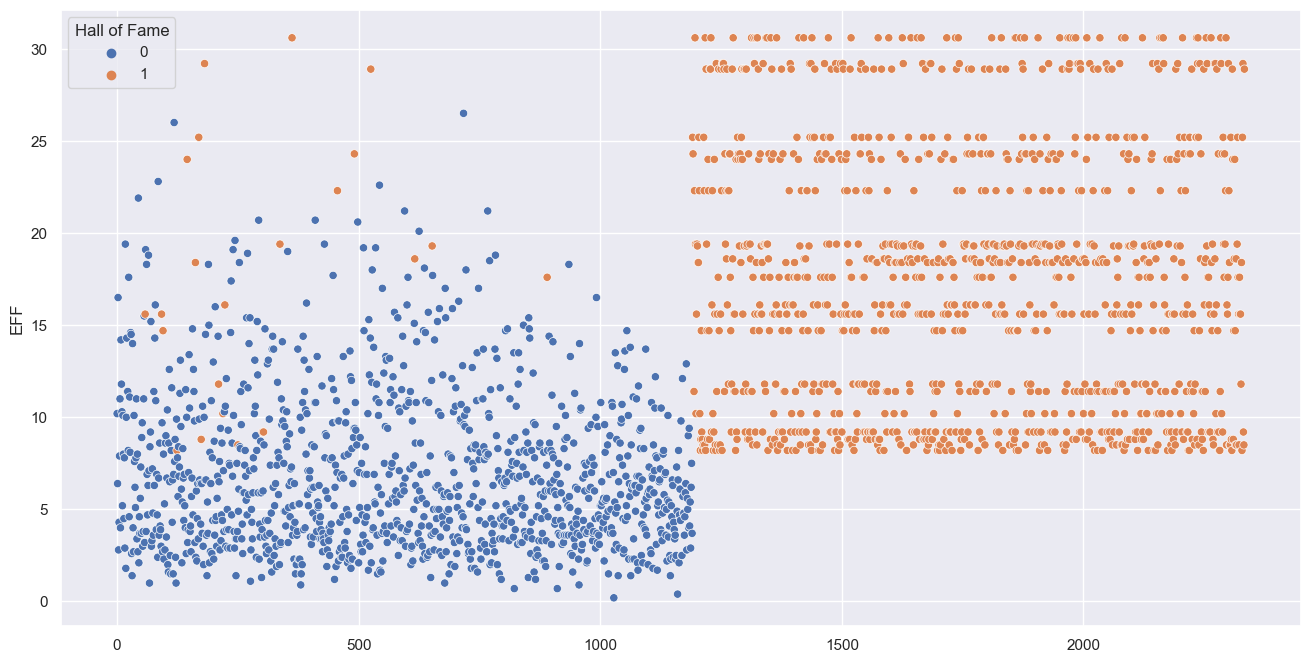

In [36]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_OS, x=data_OS.index, y='EFF', hue='Hall of Fame')
data_OS.corr()

Correlation between **EFF** and **Hall of Fame** = **0.675**

index  Year Drafted        GP       MIN       PTS       FGM  \
index         1.000000      0.998762 -0.443524 -0.275317 -0.333884 -0.369726   
Year Drafted  0.998762      1.000000 -0.451078 -0.288750 -0.348506 -0.383734   
GP           -0.443524     -0.451078  1.000000  0.673678  0.620077  0.634294   
MIN          -0.275317     -0.288750  0.673678  1.000000  0.938398  0.934023   
PTS          -0.333884     -0.348506  0.620077  0.938398  1.000000  0.992619   
FGM          -0.369726     -0.383734  0.634294  0.934023  0.992619  1.000000   
FGA          -0.333389     -0.347202  0.615070  0.942764  0.983496  0.986147   
FG%          -0.376809     -0.384108  0.513324  0.466363  0.514752  0.541683   
3P Made       0.370996      0.365989 -0.003349  0.155845  0.096664  0.057627   
3PA           0.369491      0.364685 -0.013970  0.160105  0.102156  0.062726   
3P%           0.193424      0.190221  0.023297 -0.005640 -0.025907 -0.035707   
FTM          -0.284552     -0.299016  0.545398  0.865955  0.944257  0.904002   
FTA          -0.296254     -0.311668  0.556835  0.884958  0.948698  0.917653   
FT%           0.037433      0.037078  0.134484  0.150484  0.173377  0.129938   
OREB         -0.283847     -0.295448  0.526121  0.753330  0.755127  0.767731   
DREB         -0.166423     -0.180829  0.501538  0.792755  0.796942  0.795999   
REB          -0.210493     -0.224240  0.520477  0.795407  0.798595  0.802247   
AST          -0.274406     -0.280715  0.431227  0.573133  0.516979  0.499067   
STL          -0.396370     -0.399488  0.529349  0.678600  0.668099  0.663508   
BLK          -0.137136     -0.150956  0.389187  0.634285  0.663302  0.648875   
TOV          -0.369889     -0.384631  0.622867  0.915642  0.920013  0.917006   
EFF          -0.318796     -0.333307  0.632156  0.925087  0.963377  0.954486   
Hall of Fame -0.495711     -0.510015  0.610054  0.656257  0.713250  0.716632   

                   FGA       FG%   3P Made       3PA  ...       FT%      OREB  \
index        -0.333389 -0.376809  0.370996  0.369491  ...  0.037433 -0.283847   
Year Drafted -0.347202 -0.384108  0.365989  0.364685  ...  0.037078 -0.295448   
GP            0.615070  0.513324 -0.003349 -0.013970  ...  0.134484  0.526121   
MIN           0.942764  0.466363  0.155845  0.160105  ...  0.150484  0.753330   
PTS           0.983496  0.514752  0.096664  0.102156  ...  0.173377  0.755127   
FGM           0.986147  0.541683  0.057627  0.062726  ...  0.129938  0.767731   
FGA           1.000000  0.429055  0.159436  0.171030  ...  0.170771  0.701350   
FG%           0.429055  1.000000 -0.312151 -0.346068  ... -0.114304  0.629530   
3P Made       0.159436 -0.312151  1.000000  0.988698  ...  0.259697 -0.229538   
3PA           0.171030 -0.346068  0.988698  1.000000  ...  0.268641 -0.246337   
3P%           0.028394 -0.290854  0.516972  0.511167  ...  0.380722 -0.327303   
FTM           0.888660  0.471043  0.009857  0.017590  ...  0.233775  0.720468   
FTA           0.895029  0.506827 -0.019641 -0.015595  ...  0.105846  0.790450   
FT%           0.170771 -0.114304  0.259697  0.268641  ...  1.000000 -0.155303   
OREB          0.701350  0.629530 -0.229538 -0.246337  ... -0.155303  1.000000   
DREB          0.740345  0.566000 -0.134092 -0.150797  ... -0.099458  0.910309   
REB           0.741431  0.601092 -0.170422 -0.187560  ... -0.121885  0.959677   
AST           0.567030  0.030346  0.309140  0.342565  ...  0.281179  0.046852   
STL           0.692015  0.256939  0.148767  0.185276  ...  0.192471  0.302102   
BLK           0.582929  0.509376 -0.205115 -0.225682  ... -0.106863  0.848402   
TOV           0.922389  0.434037  0.079659  0.089357  ...  0.063687  0.702310   
EFF           0.917020  0.600475 -0.026175 -0.028702  ...  0.102809  0.852922   
Hall of Fame  0.675942  0.543263 -0.106910 -0.111859  ...  0.041227  0.602498   

                  DREB       REB       AST       STL       BLK       TOV  \
index        -0.166423 -0.210493 -0.274406 -0.396370 -0.137136 -0.369889   

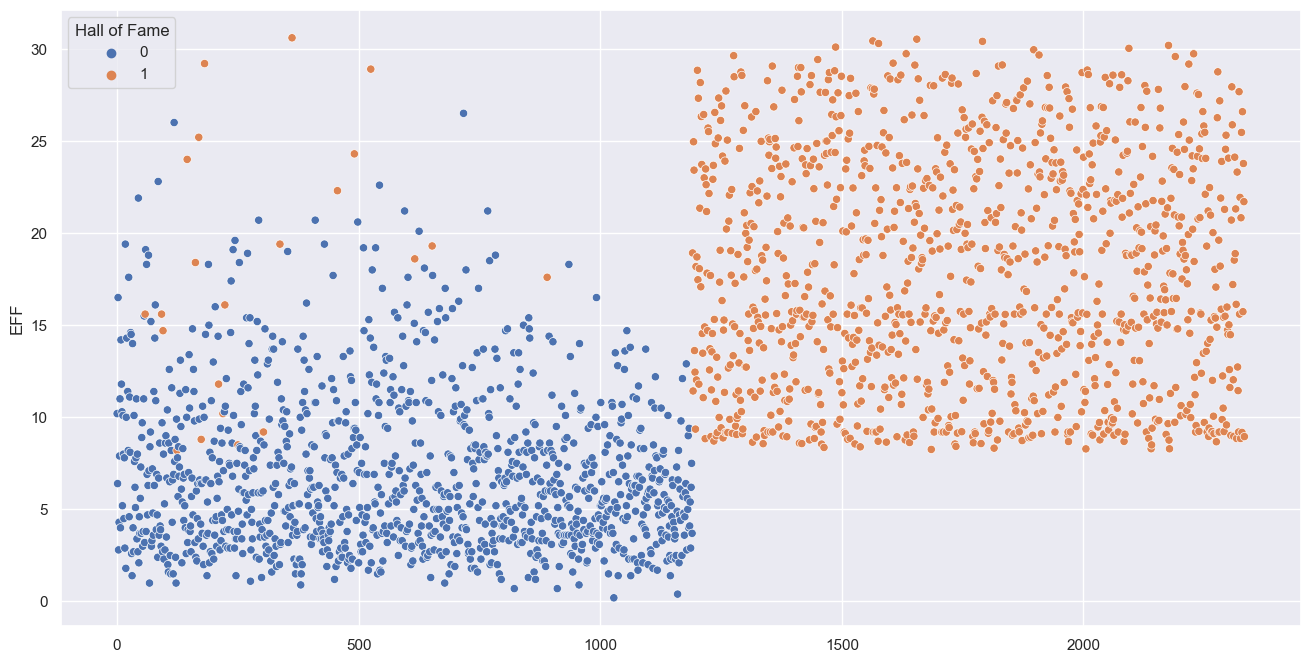

In [37]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=data_SM, x=data_SM.index, y='EFF', hue='Hall of Fame')
data_SM.corr()

Correlation between **EFF** and **Hall of Fame** = **0.718**

Considering the disadvantages of Undersampling and Oversampling, **SMOTE** will be the best way to balance our dataset, furthermore, **SMOTE** has the highest correlation between **EFF** and **Hall of Fame** among the 3 methods.

## Model Building

We will look into 4 classification machine learning models to see which is the best in helping us predict which rookie end up in the NBA hall of fame.

The 4 models we will be using are: **Logistic Regression**, **Random Forest Classifier**, **K-Nearest Neighbour** and **XGBoost**

In [38]:
#Combine the SM data and split again
data_SM = pd.concat([X_SM, y_SM],axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SM,y_SM,test_size=0.2,random_state=12345)

In [40]:
## Assuming the positive are N and negative are Y 
## Function to get TPR(True Positive Rate) and FPR(False Positive Rate)
def get_TPR(actual, prediction):
    TP = confusion_matrix(actual, prediction)[1][1]
    FN = confusion_matrix(actual, prediction)[1][0]
    TPR = (TP/(TP+FN))
    
    return TPR
    
def get_FPR(actual, prediction):
    FP = confusion_matrix(actual, prediction)[0][1]
    TN = confusion_matrix(actual, prediction)[0][0]
    FPR = (FP/(FP+TN))
    
    return FPR

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(max_iter=5000)
logR.fit(X_train,y_train.values.ravel())

logR_train_pred=logR.predict(X_train)
logR_test_pred=logR.predict(X_test)

Logistic Regression Confusion Matrix (Train)
Classification Accuracy:  0.950187466523835
TPR:  0.9852631578947368
FPR:  0.0861504907306434


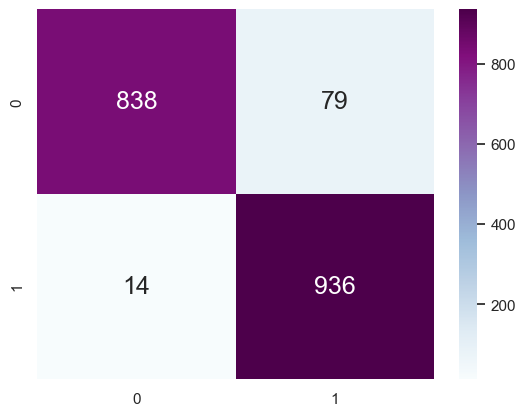

In [42]:
from sklearn.metrics import confusion_matrix
print("Logistic Regression Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, logR_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, logR_train_pred))
print('FPR: ', get_FPR(y_train, logR_train_pred))

Logistic Regression Confusion Matrix (Test)
Classification Accuracy:  0.9550321199143469
TPR:  0.9953917050691244
FPR:  0.08


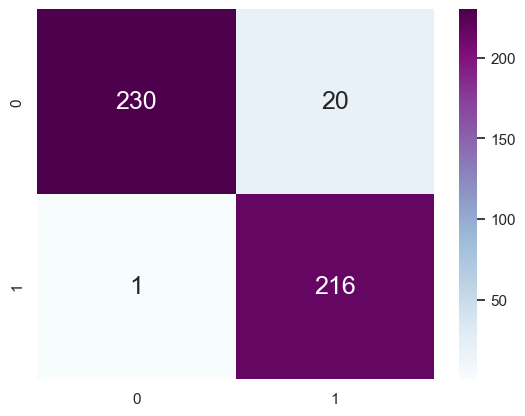

In [43]:
print("Logistic Regression Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, logR_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", logR.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, logR_test_pred))
print('FPR: ', get_FPR(y_test, logR_test_pred))

In [44]:
# F1 Score
from sklearn.metrics import f1_score
print('Logistic Regression TRAIN F1 Score: {}'.format(f1_score(y_train,logR_train_pred)))
print('Logistic Regression TEST F1 Score: {}'.format(f1_score(y_test,logR_test_pred)))

Logistic Regression TRAIN F1 Score: 0.9526717557251908
Logistic Regression TEST F1 Score: 0.9536423841059604


## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train,y_train.values.ravel())

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

Random Forest Classifier Confusion Matrix (Train)
Classification Accuracy:  0.9491162292447777
TPR:  1.0
FPR:  0.10359869138495092


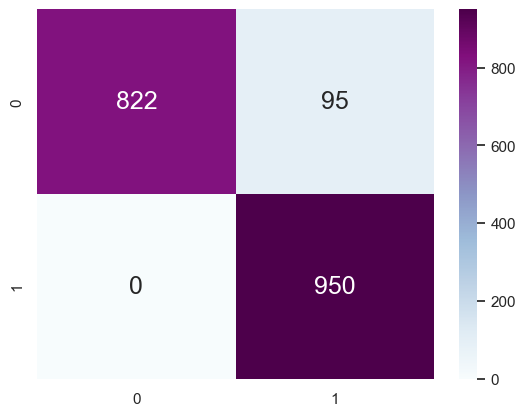

In [46]:
print("Random Forest Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, rfc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, rfc_train_pred))
print('FPR: ', get_FPR(y_train, rfc_train_pred))

Random Forest Classifier Confusion Matrix (Test)
Classification Accuracy:  0.9635974304068522
TPR:  0.9907834101382489
FPR:  0.06


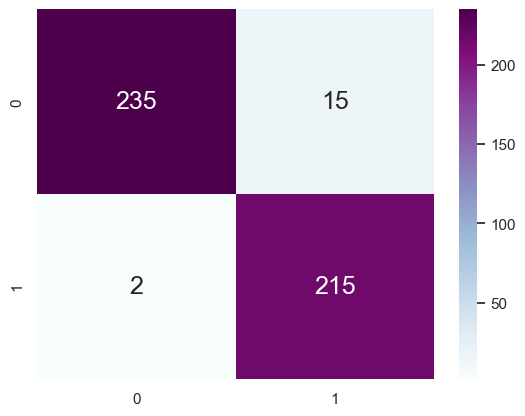

In [47]:
print("Random Forest Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, rfc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", rfc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, rfc_test_pred))
print('FPR: ', get_FPR(y_test, rfc_test_pred))

In [48]:
# F1 Score
print('Random Forest Classifier TRAIN F1 Score: {}'.format(f1_score(y_train,rfc_train_pred)))
print('Random Forest Classifier TEST F1 Score: {}'.format(f1_score(y_test,rfc_test_pred)))

Random Forest Classifier TRAIN F1 Score: 0.9523809523809523
Random Forest Classifier TEST F1 Score: 0.9619686800894856


## K-Nearest Neighbour

In [49]:
from sklearn.neighbors import KNeighborsClassifier
n=2
knn=KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train.values.ravel())

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

K-Nearest Neighbors Confusion Matrix (Train)
Classification Accuracy:  0.998393144081414
TPR:  0.9968421052631579
FPR:  0.0


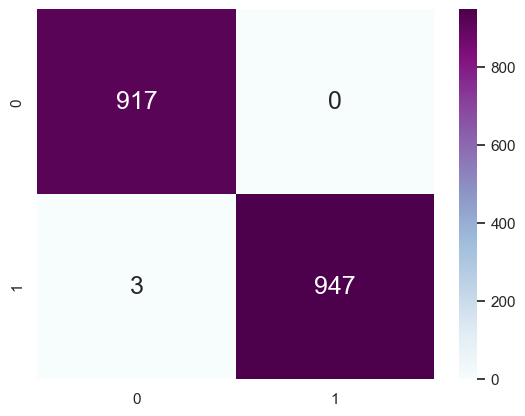

In [50]:
print("K-Nearest Neighbors Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, knn_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, knn_train_pred))
print('FPR: ', get_FPR(y_train, knn_train_pred))

K-Nearest Neighbors Confusion Matrix (Test)
Classification Accuracy:  0.9785867237687366
TPR:  0.9907834101382489
FPR:  0.032


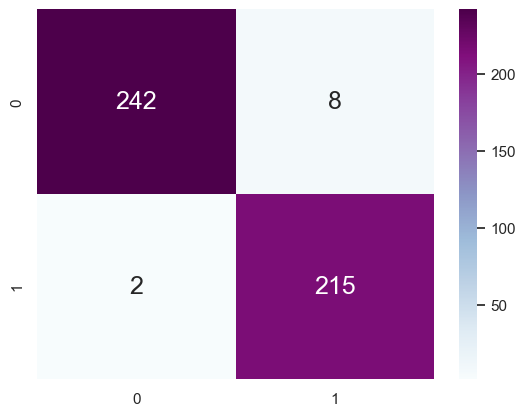

In [51]:
print("K-Nearest Neighbors Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, knn_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", knn.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, knn_test_pred))
print('FPR: ', get_FPR(y_test, knn_test_pred))

In [52]:
# F1 Score
print('K-Nearest Neighbors TRAIN F1 Score: {}'.format(f1_score(y_train,knn_train_pred)))
print('K-Nearest Neighbors TEST F1 Score: {}'.format(f1_score(y_test,knn_test_pred)))

K-Nearest Neighbors TRAIN F1 Score: 0.9984185556141276
K-Nearest Neighbors TEST F1 Score: 0.9772727272727272


## XGBoost

Unlike random forest which uses the technique of bagging, XGBoost uses the techniqueboosting. Boosting involves using trees with fewer splits. Boosting uses an ensemble technique which involves the following steps:

- An initial model F0 is defined to predict the target variable y. This model will be associated with a residual (y – F0)
- A new model h1 is fit to the residuals from the previous step
- Now, F0 and h1 are combined to give F1, the boosted version of F0. The mean squared error from F1 will be lower than that from F0

Reference: https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier

In [54]:
xgbc = XGBClassifier(
         eval_metric='aucpr')
xgbc.fit(X_train, y_train)

xgbc_train_pred = xgbc.predict(X_train)
xgbc_test_pred = xgbc.predict(X_test)

XGBoost Classifier Confusion Matrix (Train)
Classification Accuracy:  1.0
TPR:  1.0
FPR:  0.0


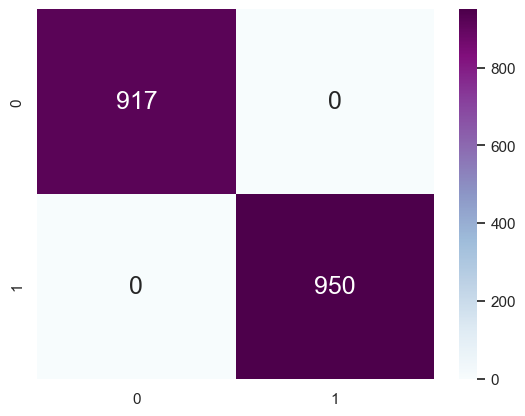

In [55]:
print("XGBoost Classifier Confusion Matrix (Train)")
sb.heatmap(confusion_matrix(y_train, xgbc_train_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_train, y_train))
print('TPR: ', get_TPR(y_train, xgbc_train_pred))
print('FPR: ', get_FPR(y_train, xgbc_train_pred))

XGBoost Classifier Confusion Matrix (Test)
Classification Accuracy:  0.987152034261242
TPR:  0.9953917050691244
FPR:  0.02


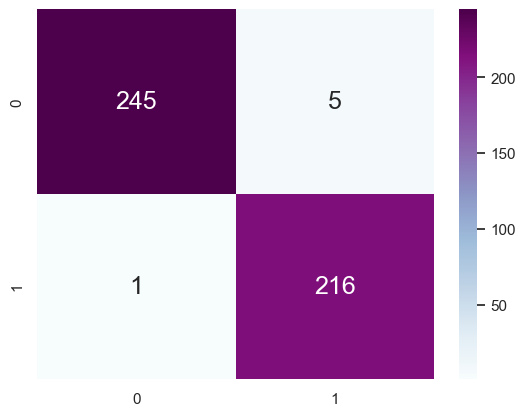

In [56]:
print("XGBoost Classifier Confusion Matrix (Test)")
sb.heatmap(confusion_matrix(y_test, xgbc_test_pred), 
           annot=True, fmt='.0f', annot_kws={"size":18}, cmap='BuPu')

print("Classification Accuracy: ", xgbc.score(X_test, y_test))
print('TPR: ', get_TPR(y_test, xgbc_test_pred))
print('FPR: ', get_FPR(y_test, xgbc_test_pred))

In [57]:
# F1 Score
print('XGBoost TRAIN F1 Score: {}'.format(f1_score(y_train,xgbc_train_pred)))
print('XGBoost TEST F1 Score: {}'.format(f1_score(y_test,xgbc_test_pred)))

XGBoost TRAIN F1 Score: 1.0
XGBoost TEST F1 Score: 0.9863013698630136


## Analysis

Based on the 4 models that we have used, we determine which model is the most effective by looking at these few indicators:
1) **Classification Accuracy**
 - Describes the overall performance of the classification model based on FN,TN,FP,TP
 
2) **True Positive Rate (TPR)**
 - TPR = TP/(TP + FN)
 
3) **False Positive Rate (FPR)**
 - FPR = FP/(FP + TN)

4) **F1 Score**
 - A weighted harmonic mean of precision and recall
 - F1 = 2 * (Precision * Recall) / (Precision + Recall)
 
### Classification Accuracy
**XGBoost** has the highest classification accuracy for both the **train** (1) and **test** datasets (0.987)

### TPR
**XGBoost** has the highest TPR for both the **train** (1) and **test** datasets (0.991)

### FPR
**XGBoost** has the lowest FPR for both the **train** (0) and **test** datasets (0.016)

### F1 Score
**XGBoost** has the higher F1 Scores for both the **train** (1) and **test** datasets (0.986)

## Conclusion

Based on the various indicators, **XGBoost** is the best and most suitable machine learning model to determine if a player will make it into the NBA hall of fame based on their rookie statistics.

## Using the model on the dataset of non-retired players

We will now utilise the K-Nearest Neighbour machine learning model to predict which **non-retired player** will make it into the hall of fame based on their rookie statistics.

In [58]:
rookiedata_active.drop(['Hall of Fame', 'Retired'], axis=1, inplace=True)
rookiedata_active

index               Name  Year Drafted    GP   MIN   PTS  FGM   FGA  \
0      775      Dirk Nowitzki          1998  47.0  20.4   8.2  2.9   7.1   
1      801       Vince Carter          1998  50.0  35.2  18.3  6.9  15.3   
2      816        Jason Terry          1999  81.0  23.3   8.1  3.1   7.4   
3      851     Jamal Crawford          2000  61.0  17.2   4.6  1.8   5.0   
4      885        Joe Johnson          2001  77.0  24.9   7.5  3.3   7.6   
..     ...                ...           ...   ...   ...   ...  ...   ...   
266   1527      Pascal Siakam          2016  32.0  17.8   5.1  2.3   4.3   
267   1528      Patrick McCaw          2016  26.0  12.2   2.8  1.1   2.8   
268   1533   Tomas Satoransky          2016  23.0  14.7   3.1  1.3   3.2   
269   1534      Troy Williams          2016  24.0  17.4   5.3  2.1   5.1   
270   1536  Willy Hernangomez          2016  28.0  13.6   5.5  2.3   4.1   

      FG%  3P Made  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0    40.5      0.3  ...  2.7  77.3   0.9   2.6  3.4  1.0  0.6  0.6  1.6   7.4  
1    45.0      0.4  ...  5.4  76.1   1.9   3.8  5.7  3.0  1.1  1.5  2.2  17.6  
2    41.5      0.6  ...  1.7  80.7   0.3   1.8  2.0  4.3  1.1  0.1  1.9   9.1  
3    35.2      0.7  ...  0.6  79.4   0.1   1.3  1.5  2.3  0.7  0.2  1.4   4.6  
4    43.0      0.5  ...  0.7  77.4   1.0   2.4  3.3  2.3  0.8  0.3  0.9   8.8  
..    ...      ...  ...  ...   ...   ...   ...  ...  ...  ...  ...  ...   ...  
266  52.5      0.0  ...  0.7  77.3   1.3   2.2  3.5  0.4  0.5  0.8  0.7   7.4  
267  38.9      0.6  ...  0.2  50.0   0.3   0.8  1.0  1.0  0.4  0.3  0.6   3.2  
268  39.7      0.1  ...  0.7  64.7   0.4   1.1  1.5  2.2  0.5  0.0  0.9   4.2  
269  41.8      0.4  ...  1.0  60.0   0.3   1.6  1.8  0.8  1.0  0.4  1.1   4.8  
270  56.0      0.1  ...  1.1  71.9   1.5   3.2  4.7  0.8  0.3  0.5  1.2   8.5  

[271 rows x 23 columns]

In [59]:
active_players = rookiedata_active[['Name']]
rookiedata_active1 = rookiedata_active.drop('Name', axis=1)
knn_active = xgbc.predict(rookiedata_active1)

In [60]:
for x, y in enumerate(knn_active):
    if y == 0:
        rookiedata_active1.drop([x], inplace=True)
        
rookiedata_active1

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
5      890          2001  82.0  36.7  17.6  6.7  13.0  51.8      0.0  0.1   
15     967          2003  79.0  39.5  20.9  7.9  18.9  41.7      0.8  2.7   
98    1244          2010  82.0  38.0  22.5  8.5  16.8  50.6      0.1  0.3   
131   1315          2011  51.0  30.5  18.5  6.9  14.6  46.9      1.4  3.6   
227   1483          2015  82.0  32.0  18.3  7.6  14.1  54.2      0.4  1.1   
258   1519          2016  22.0  24.8  18.9  6.2  13.4  46.4      1.2  3.0   

     ...  FTA   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF  
5    ...  5.8  70.9   2.9   6.0   8.9  2.7  0.5  2.1  2.7  21.1  
15   ...  5.8  75.4   1.3   4.2   5.5  5.9  1.6  0.7  3.5  18.8  
98   ...  8.5  64.2   3.3   8.8  12.1  3.8  0.8  0.6  2.7  25.6  
131  ...  3.8  87.2   0.9   2.9   3.7  5.4  1.1  0.4  3.1  17.7  
227  ...  3.4  81.1   2.8   7.7  10.5  2.0  0.7  1.7  2.2  23.8  
258  ...  6.8  77.3   2.0   5.4   7.3  1.9  0.8  2.4  3.8  18.8  

[6 rows x 22 columns]

In [61]:
df1 = rookiedata_active1.join(active_players)
df1

index  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  \
5      890          2001  82.0  36.7  17.6  6.7  13.0  51.8      0.0  0.1   
15     967          2003  79.0  39.5  20.9  7.9  18.9  41.7      0.8  2.7   
98    1244          2010  82.0  38.0  22.5  8.5  16.8  50.6      0.1  0.3   
131   1315          2011  51.0  30.5  18.5  6.9  14.6  46.9      1.4  3.6   
227   1483          2015  82.0  32.0  18.3  7.6  14.1  54.2      0.4  1.1   
258   1519          2016  22.0  24.8  18.9  6.2  13.4  46.4      1.2  3.0   

     ...   FT%  OREB  DREB   REB  AST  STL  BLK  TOV   EFF                Name  
5    ...  70.9   2.9   6.0   8.9  2.7  0.5  2.1  2.7  21.1           Pau Gasol  
15   ...  75.4   1.3   4.2   5.5  5.9  1.6  0.7  3.5  18.8        LeBron James  
98   ...  64.2   3.3   8.8  12.1  3.8  0.8  0.6  2.7  25.6       Blake Griffin  
131  ...  87.2   0.9   2.9   3.7  5.4  1.1  0.4  3.1  17.7        Kyrie Irving  
227  ...  81.1   2.8   7.7  10.5  2.0  0.7  1.7  2.2  23.8  Karl-Anthony Towns  
258  ...  77.3   2.0   5.4   7.3  1.9  0.8  2.4  3.8  18.8         Joel Embiid  

[6 rows x 23 columns]

**Using XGBoost machine learning model, we conclude that the following players are predicted to make it into the NBA hall of fame based on their rookie statistics:**

- Pau Gasol
- Lebron James
- Tyreke Evans
- Blake Griffin
- John Wall
- Kyrie Irving
- Michael Carter-Wlliams
- Karl-Anthony Towns
- Joel Embiid